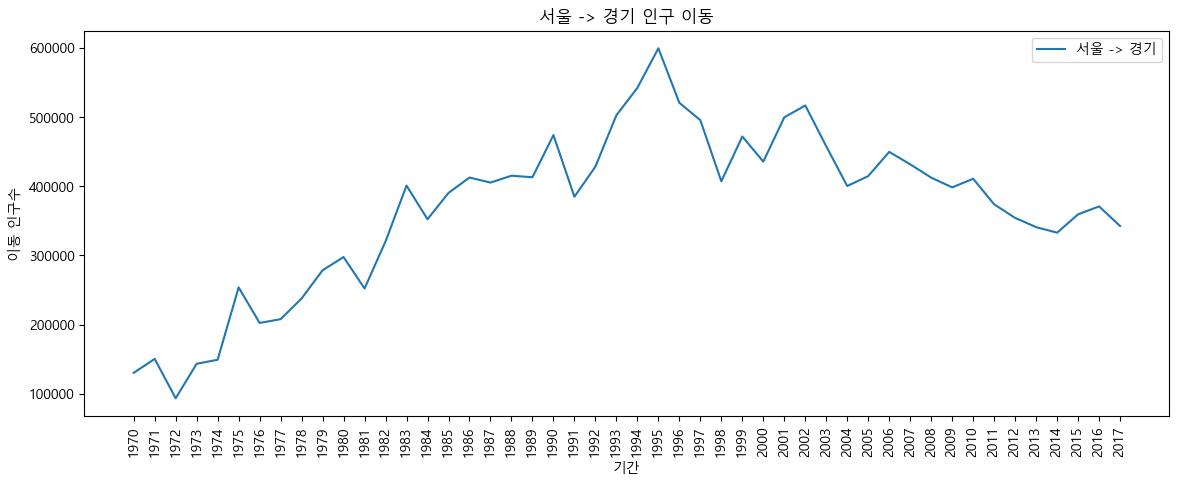

In [18]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

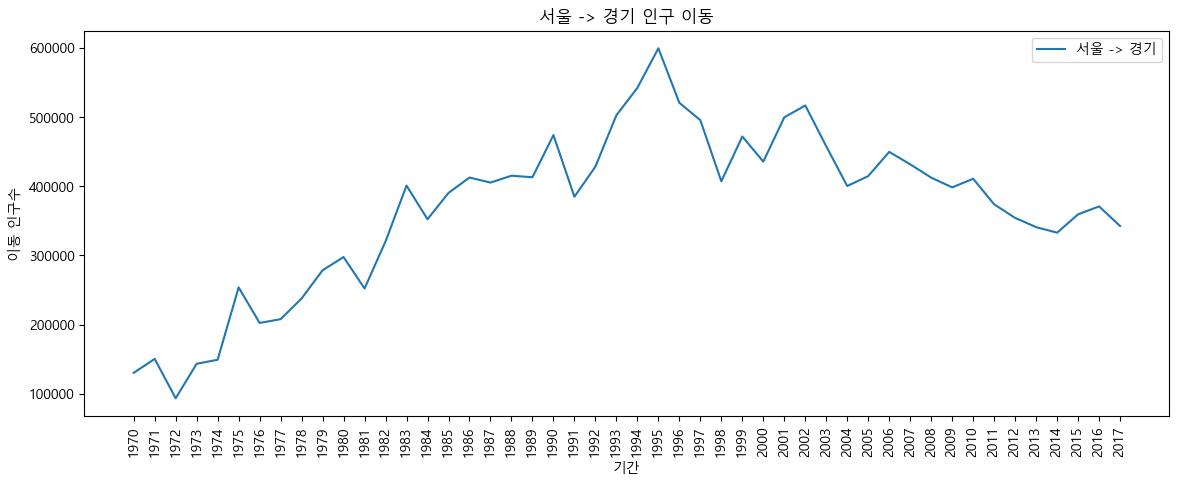

In [7]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [14]:
# 경기 -> 서울
import pandas as pd
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
# 1. head() 대략적으로 데이터를 확인
# 2. 데이터의 정보확인  info() describe()
# 3. 결측치 여부 확인
# 결측치가 확인되면 drop fillna  선택
df['전출지별'] = df['전출지별'].ffill()  # 결측치 대처, 문자열이고 병합된 컬럼의 정보가 na로 표기되어서 앞의 문자열로 대처
# df.info()
df.isna().sum().values.sum()  # 결측치 확인
pd.to_numeric(df.loc[1:,'1970'],errors='coerce')  # 문자형숫자 ->숫자로 변경하는데. 변경불가능한 데이터는 결측치로 대처

1      4046536.0
2      1742813.0
3       448577.0
4            NaN
5            NaN
         ...    
320        139.0
321        631.0
322        374.0
323        474.0
324       9290.0
Name: 1970, Length: 324, dtype: float64

In [15]:
mask = (df['전출지별'] == '경기도') & (df['전입지별'] == '서울특별시')
df2 = df[mask]
df2

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,경기도,서울특별시,95388,95423,90470,107177,107518,207641,144524,154021,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


In [16]:
df2.isna().sum().values.sum() #결측치 없음
df3 = df2.iloc[:,2:]
df3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,95388,95423,90470,107177,107518,207641,144524,154021,164771,168188,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


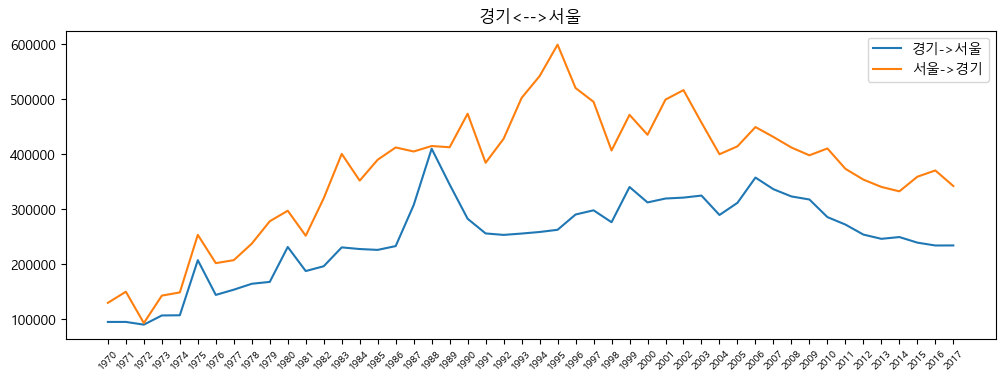

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title("경기<-->서울")

plt.plot(df3.columns,  df3.values.flatten(), label ='경기->서울' )   # 경기 -> 서울
plt.plot(sr_one.index, sr_one.values,label="서울->경기")           # 서울 -> 경기

plt.legend(loc='best')

plt.xticks(rotation=45,fontsize = 7.5)
plt.show()

In [26]:
# 1991 ~ 1995년 간의 인구 이동 데이터 추출  후 gpt에게 인구이동에 대한 추론

print(df3.loc[:,'1991':'1995'])
sr_one['1991':'1995']

       1991    1992    1993    1994    1995
164  256270  253605  256049  258897  262893


1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
Name: 경기도, dtype: object

In [27]:
너는 데이터 분석 전문가
우리는 다음데이터를 통해서 실제 어떤 사건이 일어났는지 
과거 정보를 조회해서 추론해줘

1. 경기에서 서울로 유입된 년도별 인구수
 1991    1992    1993    1994    1995
256270  253605  256049  258897  262893

2. 서울에서 경기로 유입된 년도별 인구수
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411

시각화로 확인했을때 서울에서 경기도로 이동한 인구가 급격히 증가하는 패턴을 보이는데

해당 이유에 대해서 각종 자료를검색해서 정확하게 정보를 찾아줘

SyntaxError: invalid syntax (3280411369.py, line 1)

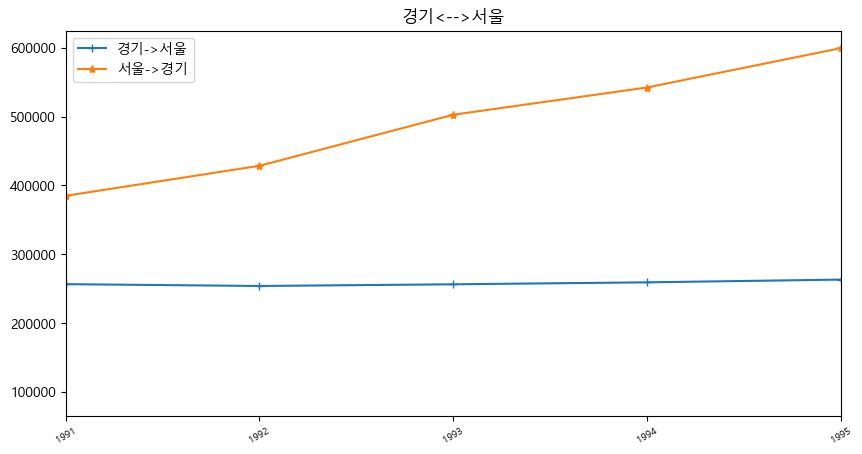

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("경기<-->서울")

plt.plot(df3.columns,  df3.values.flatten(), label ='경기->서울', marker='+')   # 경기 -> 서울
plt.plot(sr_one.index, sr_one.values,label="서울->경기", marker='*')           # 서울 -> 경기

plt.xlim('1991','1995')

plt.legend(loc='best')

plt.xticks(rotation=30,fontsize = 7)
plt.show()